# How to use this API

by Lingyi Zhang

#### In this example, we query data of LA County and NYC

In [1]:
from __future__ import print_function
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

## 1. Let's try one single point first (LA County)

In [2]:
var_lon = str(-118.159953387143)
var_lat = str(33.8719625444075)

In [3]:
url = "https://d5tgnm602g.execute-api.us-east-1.amazonaws.com/beta/la?long="\
      + var_lon + "&lati=" + var_lat

In [4]:
response = urllib.urlopen(url)
data = response.read()
data_json = json.loads(data)   #change to json format
data_json

[{'area_code': '817.000000000',
  'area_name': 'LONG BEACH AREA',
  'bg10': '5702042',
  'cb10': '2006',
  'city': 'Long Beach',
  'ct10': '570204',
  'dist_cong': '44.0000000000',
  'dist_stass': '63.0000000000',
  'dist_stsen': '33.0000000000',
  'dist_sup': '4.00000000000',
  'gid': 322903,
  'hd_2012': '40',
  'hd_name': 'Long Beach',
  'la_fip10': '43000',
  'name': 'Long Beach Police',
  'name_1': 'Long Beach',
  'prc_name': 'LONG BEACH',
  'precinct': '3850029A',
  'puma10': '03763',
  'rd': '48-2',
  'shape_area': '466.321237884',
  'shape_leng': '387.348209943',
  'the_geom': '0106000020E61000000100000001030000000100000005000000E7A821AD3C8A5DC09BC8F9779CEF40404C2CDFD63C8A5DC0F803AD779CEF4040D01242D13C8A5DC01A70D0AFADEF4040674A9DB73C8A5DC03A9CE9AFADEF4040E7A821AD3C8A5DC09BC8F9779CEF4040',
  'zcta10': '90805'}]

In [5]:
#extract the puma10 for example
data_json[0]['puma10']

'03763'

## 2. Query 5 points (LA County)

In [6]:
import numpy as np
import pandas as pd

In [7]:
#5 points in LA county
points = [(-118.281503, 34.383769),
          (-118.352919, 34.012348),
          (-118.159848, 33.826203),
          (-118.062350, 33.960715),
          (-118.159953387143, 33.8719625444075)]
labels = ['longitude', 'latitude']
df_quer = pd.DataFrame.from_records(points, columns=labels)
df_quer

,longitude,latitude
0,-118.281503,34.383769
1,-118.352919,34.012348
2,-118.159848,33.826203
3,-118.062350,33.960715
4,-118.159953,33.871963


In [8]:
#Query the API
resultlist = []
for i in range(len(df_quer)):
    var_lon = str(df_quer.iloc[i].longitude)
    var_lat = str(df_quer.iloc[i].latitude)
    
    url = "https://d5tgnm602g.execute-api.us-east-1.amazonaws.com/beta/la?long="\
      + var_lon + "&lati=" + var_lat
    
    data = urllib.urlopen(url).read()
    print("Query point {} ...".format(i+1))
    data_json = json.loads(data)
    resultlist.append(data_json[0])

df = pd.DataFrame(resultlist)

Query point 1 ...
Query point 2 ...
Query point 3 ...
Query point 4 ...
Query point 5 ...


In [9]:
df

,area_code,area_name,bg10,cb10,city,ct10,dist_cong,dist_stass,dist_stsen,dist_sup,...,name,name_1,prc_name,precinct,puma10,rd,shape_area,shape_leng,the_geom,zcta10
0,820.000000000,ANTELOPE VALLEY,9302002,2012,Unincorporated,930200,25.0000000000,36.0000000000,25.0000000000,5.00000000000,...,Crescenta Valley Sheriff,Angeles National Forest,ACTON,0050025C,03701,1256,62410553.1831,43998.0247855,0106000020E6100000010000000103000000010000001D...,91387
1,801.000000000,ADAMS AREA,2362022,2001,Los Angeles,236202,37.0000000000,54.0000000000,30.0000000000,2.00000000000,...,LAPD Southwest Division,Crenshaw,LOS ANGELES,9002110C,03747,0361,95934.4321904,1683.74957954,0106000020E61000000200000001030000000100000005...,90008
2,817.000000000,LONG BEACH AREA,9800181,1001,Long Beach,980018,47.0000000000,70.0000000000,33.0000000000,4.00000000000,...,Long Beach Police,Long Beach,LONG BEACH,3850067D,03765,470,1171119.99084,5261.25374460,0106000020E6100000010000000103000000010000001C...,90807
3,834.000000000,WHITTIER AREA,5027002,2012,Santa Fe Springs,502700,38.0000000000,57.0000000000,32.0000000000,4.00000000000,...,Whittier Police,Santa Fe Springs,SANTA FE SPRINGS,6230011A,03754,1,1703893.38661,5563.81243254,0106000020E61000000100000001030000000100000022...,90670
4,817.000000000,LONG BEACH AREA,5702042,2006,Long Beach,570204,44.0000000000,63.0000000000,33.0000000000,4.00000000000,...,Long Beach Police,Long Beach,LONG BEACH,3850029A,03763,48-2,466.321237884,387.348209943,0106000020E61000000100000001030000000100000005...,90805


## 3. Real World Data

#### NYC 311 water system complaint data with geo-cross-walk (from 2018-01-22 till now)

In [21]:
import os
import matplotlib.pyplot as plt

In [11]:
#nyc open data API, you need apptoken to run this cell
from sodapy import Socrata
client = Socrata("data.cityofnewyork.us", os.getenv("apptoken"))

In [12]:
results = client.get("fhrw-4uyv",
                     select = "created_date, complaint_type, latitude, longitude",
                     where="complaint_type='Water System' and created_date > '2018-01-22T00:00:12.000'",
                     limit=167000)
df_water = pd.DataFrame.from_records(results)
df_water.dropna(inplace=True)
df_water.reset_index(drop=True, inplace=True)
print("Total sample size: {}".format(df_water.shape))
df_water.head()

Total sample size: (5654, 4)


,complaint_type,created_date,latitude,longitude
0,Water System,2018-01-22T14:55:00.000,40.600546459437005,-74.1239312104186
1,Water System,2018-01-22T16:34:00.000,40.54454632291107,-74.14763575960957
2,Water System,2018-01-22T14:53:00.000,40.545058317836954,-74.14649629470112
3,Water System,2018-01-22T21:08:00.000,40.77495400459102,-73.84180536130168
4,Water System,2018-01-22T12:32:00.000,40.85276928326472,-73.9303006669867


In [13]:
#Query the geo-cross-walk API
resultlist = []
for i in range(len(df_water)):
    var_lon = str(df_water.iloc[i].longitude)
    var_lat = str(df_water.iloc[i].latitude)
    
    url = "https://d5tgnm602g.execute-api.us-east-1.amazonaws.com/beta/nyc?long="\
      + var_lon + "&lati=" + var_lat
    
    data = urllib.urlopen(url).read()
    data_json = json.loads(data)
    try:
        resultlist.append(data_json[0])
    except KeyError:
        print("KeyError at {}".format(i))
        continue
    except IndexError:
        print("IndexError at {}".format(i))
        continue
    if i % 1000 == 0:
        print("Query point {} ...".format(i+1))

df_api = pd.DataFrame(resultlist)
df_final = pd.concat([df_water, df_api], axis=1)

Query point 1 ...
Query point 1001 ...
Query point 2001 ...
Query point 3001 ...
KeyError at 3283
Query point 4001 ...
IndexError at 4991
Query point 5001 ...


Here the query point which is unsuccessful turns out to be out of NYC.

In [17]:
df_final.dropna(inplace=True)
df_final.reset_index(drop=True, inplace=True)
df_final.head()

,complaint_type,created_date,latitude,longitude,assemdist,bctcb2010,borocd,borocode,boroct2010,boroname,...,gid,hcentdist,healtharea,ntacode,ntaname,precinct,puma,schooldist,stsendist,the_geom
0,Water System,2018-01-22T14:55:00.000,40.600546459437005,-74.1239312104186,63.0,50187023012,502.0,5,5018702,Staten Island,...,3116.0,51.0,5.0,SI05,New Springville-Bloomfield-Travis,121.0,3902,31.0,24.0,0106000020E61000000100000001030000000100000009...
1,Water System,2018-01-22T16:34:00.000,40.54454632291107,-74.14763575960957,64.0,50132032017,503.0,5,5013203,Staten Island,...,2550.0,51.0,5.0,SI54,Great Kills,122.0,3901,31.0,24.0,0106000020E6100000010000000103000000010000001A...
2,Water System,2018-01-22T14:53:00.000,40.545058317836954,-74.14649629470112,64.0,50132032016,503.0,5,5013203,Staten Island,...,2520.0,51.0,5.0,SI54,Great Kills,122.0,3901,31.0,24.0,0106000020E61000000100000001030000000100000009...
3,Water System,2018-01-22T21:08:00.000,40.77495400459102,-73.84180536130168,27.0,40907001016,407.0,4,4090700,Queens,...,20407.0,43.0,4.0,QN23,College Point,109.0,4103,25.0,11.0,0106000020E61000000100000001030000000100000007...
4,Water System,2018-01-22T12:32:00.000,40.85276928326472,-73.9303006669867,72.0,10269006001,112.0,1,1027900,Manhattan,...,5392.0,17.0,1.0,MN35,Washington Heights North,34.0,3801,6.0,31.0,0106000020E61000000100000001030000000100000005...


In [19]:
#show all the geometry levels we can use
df_final.columns

Index(['complaint_type', 'created_date', 'latitude', 'longitude', 'assemdist',
       'bctcb2010', 'borocd', 'borocode', 'boroct2010', 'boroname',
       'cartodb_id', 'cb2010', 'cdeligibil', 'congdist', 'coundist', 'ct2010',
       'electdist', 'firebn', 'fireconum', 'firecotype', 'firediv', 'gid',
       'hcentdist', 'healtharea', 'ntacode', 'ntaname', 'precinct', 'puma',
       'schooldist', 'stsendist', 'the_geom'],
      dtype='object')

### With geo-cross-walk, we now can easily do analysis on different geometry level without importing extra datasets.

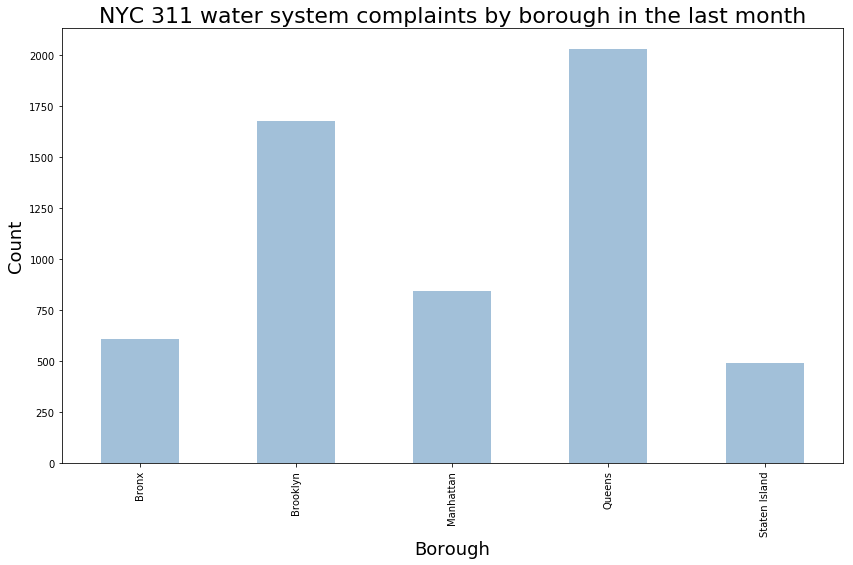

In [22]:
fig = plt.figure(figsize=(14,8))
ax = df_final.groupby(df_final['boroname']).count().loc[:,"complaint_type"].plot(kind="bar", color='SteelBlue', alpha=0.5)
ax.set_xlabel('Borough', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('NYC 311 water system complaints by borough in the last month', fontsize=22)

plt.show()

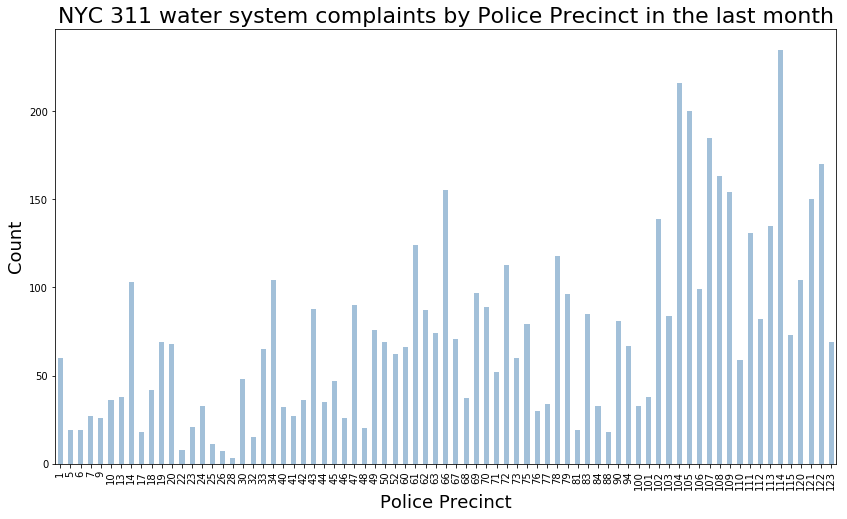

In [23]:
fig = plt.figure(figsize=(14,8))
df_final['precinct'] = df_final['precinct'].astype(float).astype(int)
ax = df_final.groupby(df_final['precinct']).count().loc[:,"complaint_type"].plot(kind="bar", color='SteelBlue', alpha=0.5)
ax.set_xlabel('Police Precinct', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('NYC 311 water system complaints by Police Precinct in the last month', fontsize=22)

plt.show()